In [48]:
%matplotlib inline
from fastai.vision import *
from fastai import *
from torch.autograd import Variable

import os

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [49]:
# path =Path('/media/subhaditya/DATA/PLAYGROUND/randomDL/ganAgain/data')

In [3]:
path = Path("data")
path_hr = path / "normal"
path_lr = path / "hazy"

In [4]:
il = ImageList.from_folder(path_hr)

In [5]:
il

ImageList (55 items)
Image (3, 1200, 1600),Image (3, 1200, 1600),Image (3, 1200, 1600),Image (3, 1200, 1600),Image (3, 1200, 1600)
Path: data/normal

In [6]:
bs, size = 32, 128

In [7]:
src = ImageImageList.from_folder(path_lr).split_by_rand_pct()

In [8]:
def get_data(bs, size):
    data = (
        src.label_from_func(lambda x: path_hr / x.name)
        .transform(get_transforms(max_zoom=2.0), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats, do_y=True)
    )

    #     data.c = 3
    return data

In [9]:
data_gen = get_data(bs, size)

In [11]:
data_gen

ImageDataBunch;

Train: LabelList (44 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: data/hazy;

Valid: LabelList (11 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: data/hazy;

Test: None

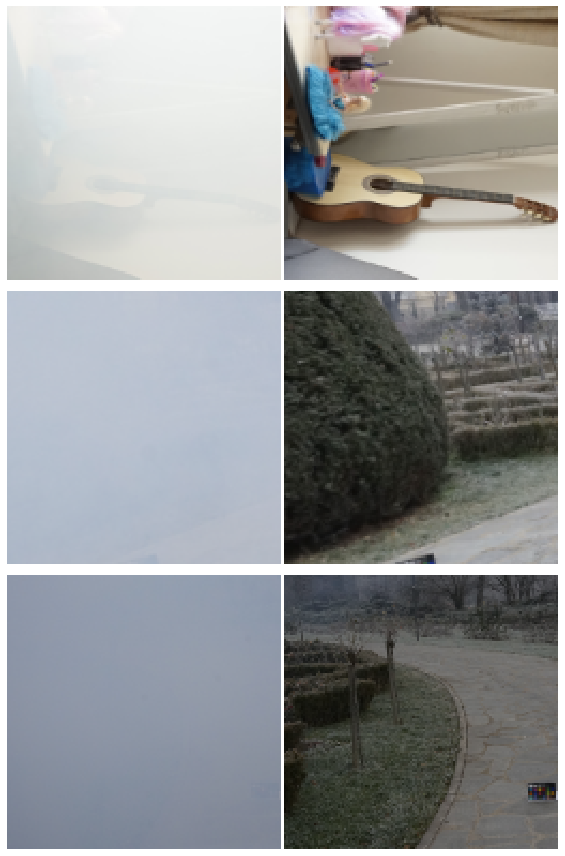

In [12]:
data_gen.show_batch(3)

In [57]:
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, padding=4)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, padding=0)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(32, 3, kernel_size=5, padding=2)

    def forward(self, x):

        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.conv3(out)

        return out

In [62]:
learn = None
gc.collect()

782

In [63]:
learn = Learner(
    data_gen, SRCNN(), opt_func=AdamW, callback_fns=ShowGraph, loss_func=MSELossFlat()
).to_fp16()

epoch,train_loss,valid_loss,time
0,1.056568,0.977986,00:06
1,1.020572,0.976067,00:05
2,1.007147,0.974469,00:05
3,0.998482,0.972790,00:05
4,1.005167,0.971301,00:05
5,1.005120,0.969632,00:05
6,1.018255,0.968152,00:05
7,1.019191,0.966508,00:05
8,1.008362,0.965004,00:05
9,1.020838,0.963479,00:05


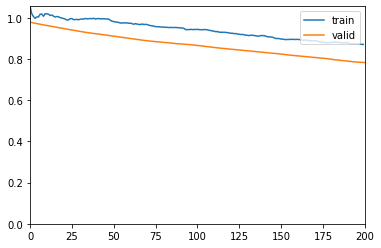

In [64]:
learn.unfreeze()
learn.fit(200, 3e-5)

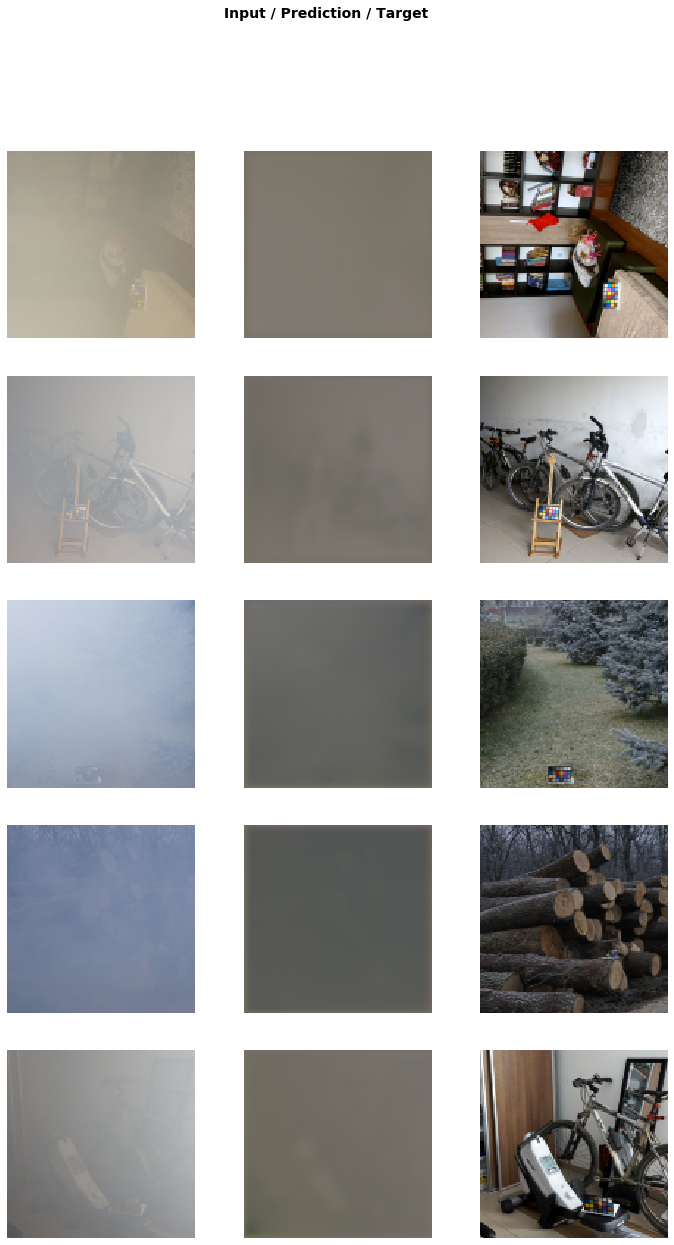

In [65]:
learn.show_results()

epoch,train_loss,valid_loss,time
0,0.780611,0.782181,00:05
1,0.880034,0.781489,00:05
2,0.888374,0.780872,00:05
3,0.877983,0.780340,00:05
4,0.885959,0.779784,00:05
5,0.874435,0.779257,00:05
6,0.867250,0.778764,00:05
7,0.864615,0.778334,00:06
8,0.870702,0.777969,00:05
9,0.859041,0.777750,00:05


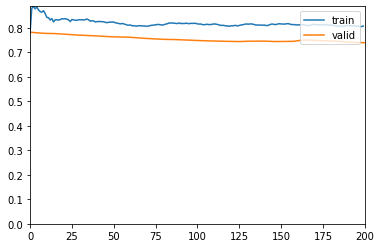

In [66]:
learn.unfreeze()
learn.fit(200, 3e-5)

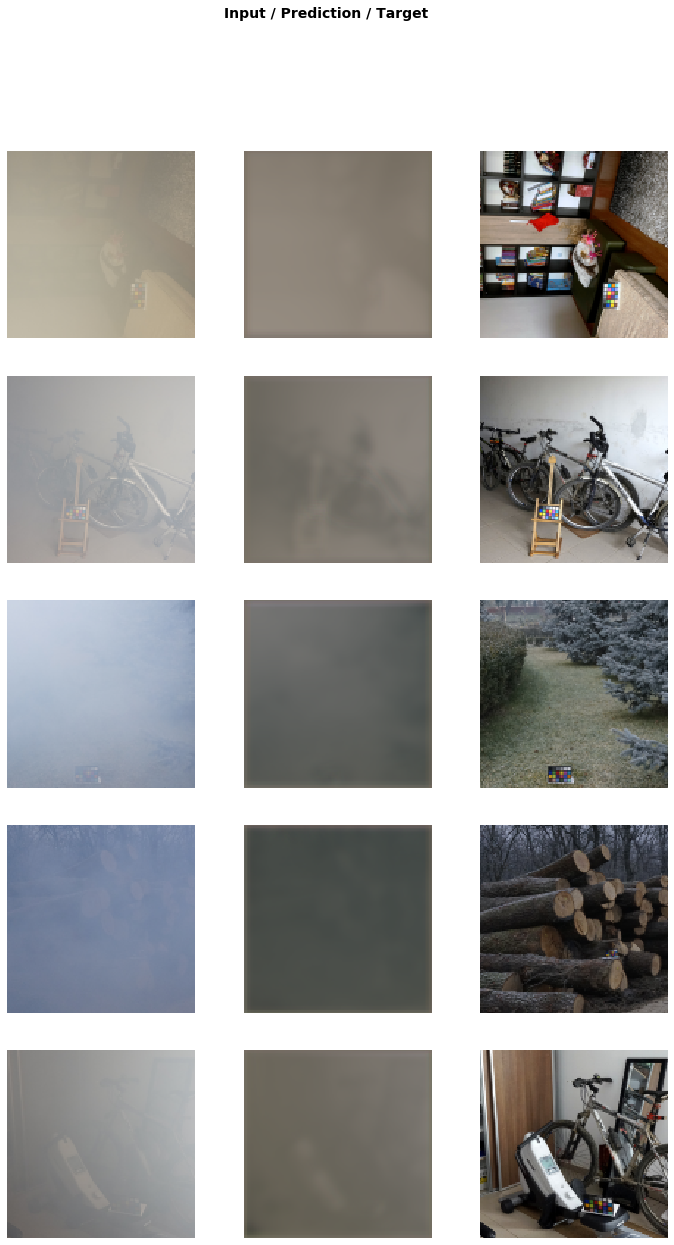

In [67]:
learn.show_results()

epoch,train_loss,valid_loss,time
0,0.760298,0.740599,00:05
1,0.773842,0.739786,00:05
2,0.793829,0.738930,00:05
3,0.782661,0.738471,00:05
4,0.793540,0.738720,00:05
5,0.793521,0.739357,00:05
6,0.793139,0.740405,00:05
7,0.792656,0.741843,00:05
8,0.800919,0.742065,00:05
9,0.802200,0.742238,00:05


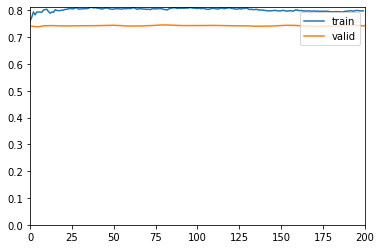

In [68]:
learn.unfreeze()
learn.fit(200, 3e-5)

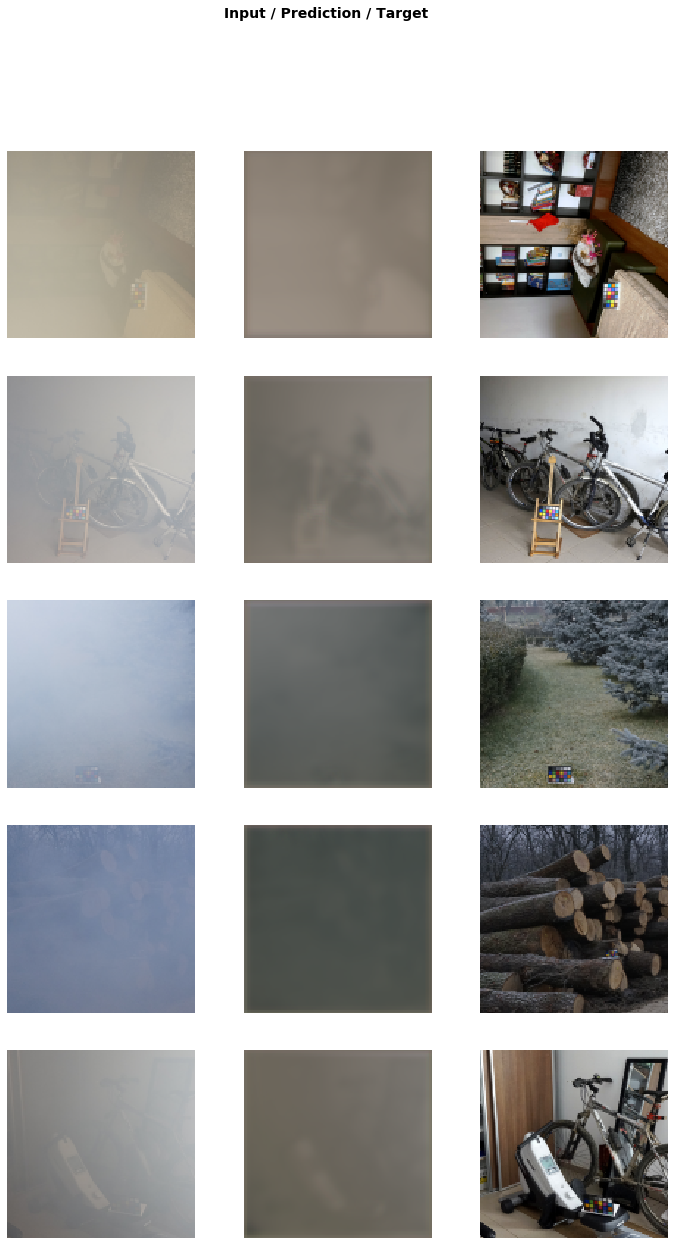

In [69]:
learn.show_results()

epoch,train_loss,valid_loss,time
0,0.740188,#na#,00:04
1,0.772906,#na#,00:04
2,0.777029,#na#,00:04
3,0.776778,#na#,00:04
4,0.765025,#na#,00:04
5,0.773759,#na#,00:04
6,0.776297,#na#,00:04
7,0.779944,#na#,00:04
8,0.781101,#na#,00:04
9,0.791492,#na#,00:04


Exception ignored in: Traceback (most recent call last):
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
<function _ConnectionBase.__del__ at 0x7fb417855050>
Traceback (most recent call last):
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 132, in __del__
    self._close()
  File "/home/subhaditya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


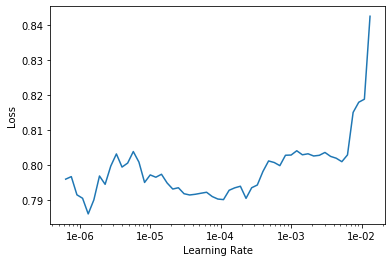

In [75]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,time
0,0.783714,0.740800,00:05
1,0.806238,0.740899,00:06
2,0.832990,0.741474,00:05
3,0.792245,0.741505,00:05
4,0.790433,0.741628,00:05
5,0.794222,0.741689,00:05
6,0.800351,0.741791,00:05
7,0.802655,0.741771,00:05
8,0.793657,0.741597,00:05
9,0.796040,0.741586,00:05


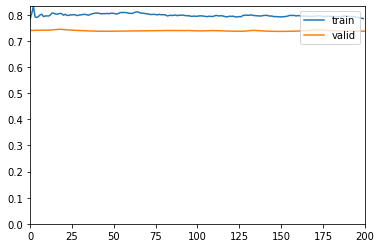

In [76]:
learn.unfreeze()
learn.fit(200, 3e-5)

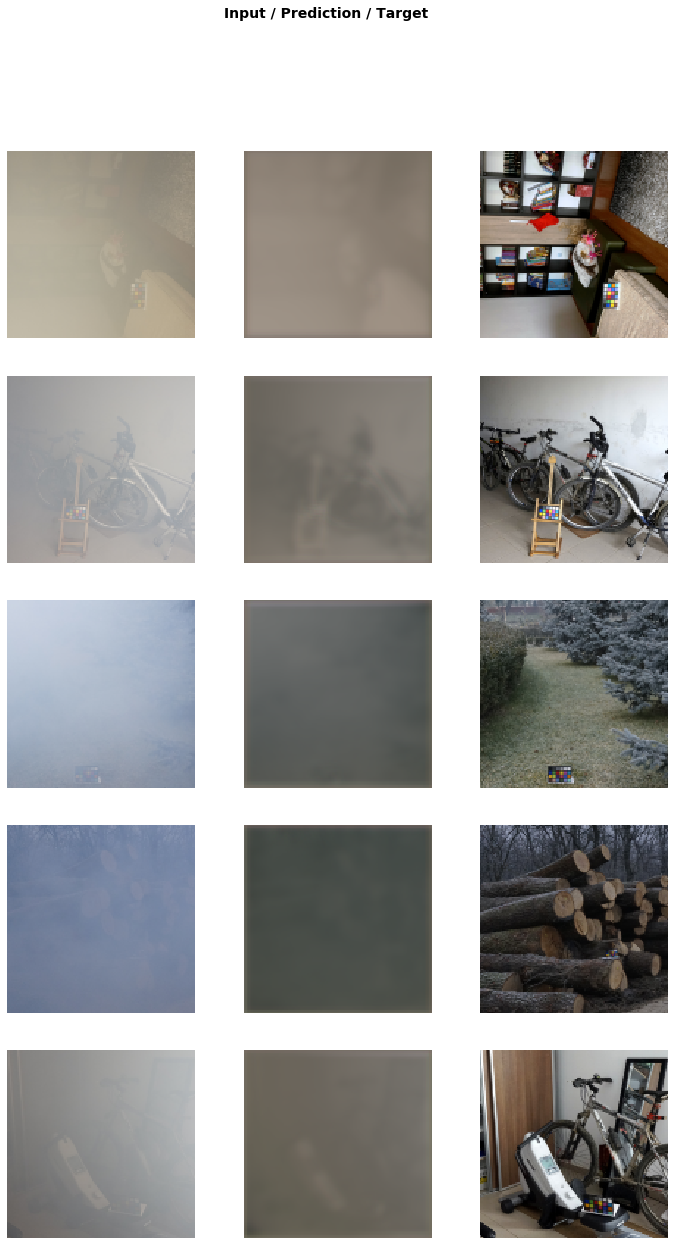

In [77]:
learn.show_results()

epoch,train_loss,valid_loss,time
0,0.825315,0.738092,00:06
1,0.793865,0.739324,00:05
2,0.796798,0.739795,00:06
3,0.755362,0.739627,00:05
4,0.748595,0.739455,00:05
5,0.771360,0.739801,00:05
6,0.788057,0.739927,00:05
7,0.793934,0.739802,00:05
8,0.795264,0.739568,00:05
9,0.801756,0.739260,00:05


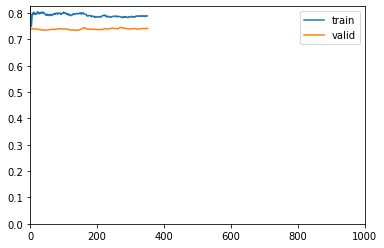

KeyboardInterrupt: 

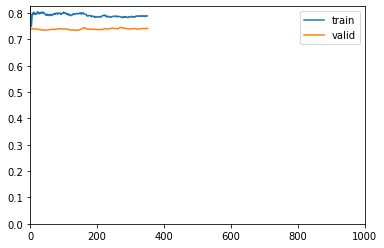

In [78]:
learn.unfreeze()
learn.fit(1000, 3e-5)

In [ ]:
learn.show_results()

In [80]:
import netron

In [81]:
dummy_input = Variable(torch.randn(1, 3, 128, 128)).cuda().half()
torch.onnx.export(learn.model, dummy_input, "model.onnx")
netron.start("model.onnx")

Serving 'model.onnx' at http://localhost:8080
